In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [4]:
df = pd.read_csv('../datasets/kaggle/titanic/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Sex']= pd.Categorical(df['Sex'])
df['SexC'] = df['Sex'].cat.codes
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexC
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [6]:
df['Embarked']= pd.Categorical(df['Embarked'])
df['EmbarkedC'] = df['Embarked'].cat.codes
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexC,EmbarkedC
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2


In [7]:
data = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'SexC', 'EmbarkedC']]
data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,SexC,EmbarkedC
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [8]:
data = data.dropna()
data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,SexC,EmbarkedC
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [10]:
X = np.array(data)
X[:5,:]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ,
         2.    ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ,
         0.    ],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ,
         2.    ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ,  0.    ,
         2.    ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ,  1.    ,
         2.    ]])

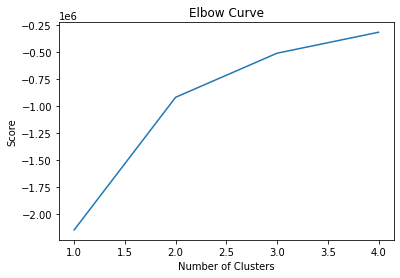

In [14]:
Nc = range(1, 5)
kmeans = [KMeans(n_clusters=i) for i in Nc]
#kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
#score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[  0.7          1.125       35.916        0.63333333   0.44166667
   85.27184083   0.475        1.18333333]
 [  0.77777778   1.          31.16666667   0.83333333   1.16666667
  285.38148333   0.33333333   0.77777778]
 [  0.33333333   2.50694444  28.35807292   0.47743056   0.40625
   16.32360312   0.67708333   1.69791667]]
